In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split #test ve train ayırmak için
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential #Model Oluşturma
from tensorflow.keras.layers import Dense  #Katman Oluşturma
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataFrame = pd.read_csv("audi.csv")

In [3]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [4]:
dataFrame.isnull().sum() #null değer kontrolü

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

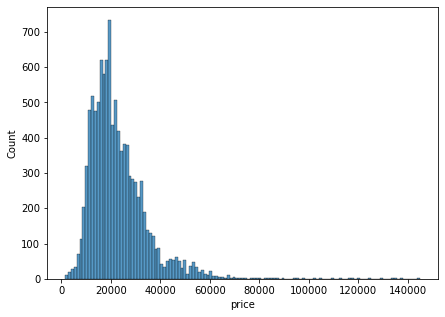

In [5]:
plt.figure(figsize=(7,5))
sbn.histplot(dataFrame["price"])  # histogram dağılım grafiği 

C:\Users\oguzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

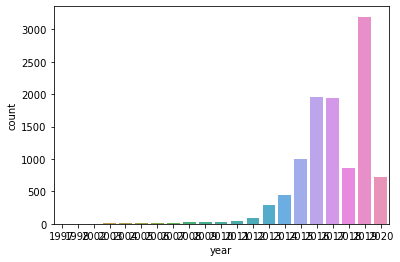

In [6]:
sbn.countplot(dataFrame["year"])  #kaç adet olduğunu gösteren grafik

In [7]:
dataFrame.corr() #correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


In [8]:
dataFrame.corr()["price"].sort_values()

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

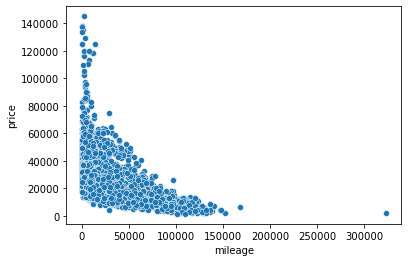

In [9]:
sbn.scatterplot(x = "mileage", y="price",data=dataFrame)

In [10]:
dataFrame.sort_values("price",ascending= False).head(20) #ascending en yüksek fiyatı en yukarıda getirecek

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2


In [11]:
len(dataFrame)

10668

In [12]:
len(dataFrame) * 0.01   #atmak istediğimiz veri sayısı

106.68

In [13]:
yeniDataFrame = dataFrame.sort_values("price", ascending = False).iloc[106:]

In [14]:
yeniDataFrame.describe() #en yüksek fiyatlı 106 adet verinin çıkarılmış hali

,year,price,mileage,tax,mpg,engineSize
count,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000
mean,2017.079909,22331.520640,25012.921038,125.730449,50.977978,1.912412
std,2.166547,10079.220417,23540.812433,67.199298,12.837371,0.571433
min,1997.000000,1490.000000,5.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19298.000000,145.000000,49.600000,2.000000
75%,2019.000000,27847.750000,36715.000000,145.000000,58.900000,2.000000
max,2020.000000,59995.000000,323000.000000,580.000000,188.300000,6.300000


<AxesSubplot:xlabel='price', ylabel='Count'>

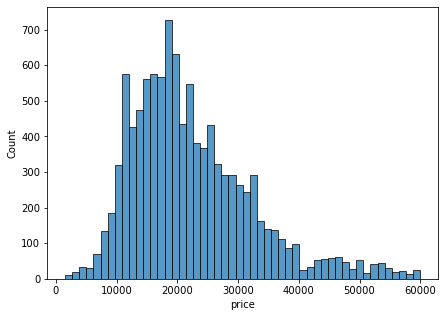

In [15]:
plt.figure(figsize=(7,5))
sbn.histplot(yeniDataFrame["price"])

In [16]:
dataFrame.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16908.725051
2017    19951.624289
2018    26296.707176
2019    30410.752268
2020    35967.067039
Name: price, dtype: float64

In [17]:
yeniDataFrame.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16847.266055
2017    19908.537506
2018    25465.005896
2019    29689.902060
2020    33201.278274
Name: price, dtype: float64

In [18]:
dataFrame = dataFrame.drop("model",axis=1)
dataFrame = dataFrame.drop("fuelType",axis=1)
dataFrame = dataFrame.drop("transmission",axis=1)

In [19]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [20]:
y

array([12500, 16500, 11000, ..., 17199, 19499, 15999], dtype=int64)

In [21]:
x

array([[2.0170e+03, 1.5735e+04, 1.5000e+02, 5.5400e+01, 1.4000e+00],
       [2.0160e+03, 3.6203e+04, 2.0000e+01, 6.4200e+01, 2.0000e+00],
       [2.0160e+03, 2.9946e+04, 3.0000e+01, 5.5400e+01, 1.4000e+00],
       ...,
       [2.0200e+03, 6.0900e+02, 1.5000e+02, 4.9600e+01, 1.0000e+00],
       [2.0170e+03, 8.6460e+03, 1.5000e+02, 4.7900e+01, 1.4000e+00],
       [2.0160e+03, 1.1855e+04, 1.5000e+02, 4.7900e+01, 1.4000e+00]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [23]:
len(x_train)

7467

In [24]:
len(x_test)

3201

In [25]:
scaler = MinMaxScaler()

In [26]:
x_train = scaler.fit_transform(x_train)

In [27]:
x_test = scaler.fit_transform(x_test)

In [28]:
x_train.shape

(7467, 5)

In [91]:
model = Sequential()

model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [92]:
model.fit(x = x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 666118144.0000 - val_loss: 650670720.0000
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 666112640.0000 - val_loss: 650665792.0000
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 666097920.0000 - val_loss: 650634304.0000
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 666038784.0000 - val_loss: 650517504.0000
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 665824576.0000 - val_loss: 650104448.0000
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 665123840.0000 - val_loss: 648822144.0000
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 663095296.0000 - val_loss: 645352320.0000
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 657993792.0000 - val_loss: 637171904.0000
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 6468737

30/30 [==============================] - 0s 4ms/step - loss: 59042868.0000 - val_loss: 44593292.0000
Epoch 73/100
30/30 [==============================] - 0s 3ms/step - loss: 57357276.0000 - val_loss: 43449804.0000
Epoch 74/100
30/30 [==============================] - 0s 3ms/step - loss: 55743800.0000 - val_loss: 41934044.0000
Epoch 75/100
30/30 [==============================] - 0s 3ms/step - loss: 54119124.0000 - val_loss: 40677612.0000
Epoch 76/100
30/30 [==============================] - 0s 3ms/step - loss: 52509312.0000 - val_loss: 39391480.0000
Epoch 77/100
30/30 [==============================] - 0s 3ms/step - loss: 50921516.0000 - val_loss: 38346016.0000
Epoch 78/100
30/30 [==============================] - 0s 3ms/step - loss: 49340816.0000 - val_loss: 37139700.0000
Epoch 79/100
30/30 [==============================] - 0s 3ms/step - loss: 47776820.0000 - val_loss: 35876816.0000
Epoch 80/100
30/30 [==============================] - 0s 3ms/step - loss: 46299900.0000 - val_loss: 3

In [93]:
kayipVeri = pd.DataFrame(model.history.history)

In [94]:
kayipVeri.head()

,loss,val_loss
0,666118144.0,650670720.0
1,666112640.0,650665792.0
2,666097920.0,650634304.0
3,666038784.0,650517504.0
4,665824576.0,650104448.0


<AxesSubplot:>

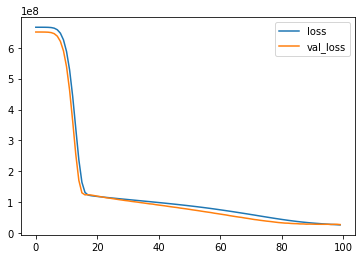

In [95]:
kayipVeri.plot()

In [96]:
tahminDizisi = model.predict(x_test)

In [97]:
mean_absolute_error(y_test,tahminDizisi)

3783.83686223696

In [98]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


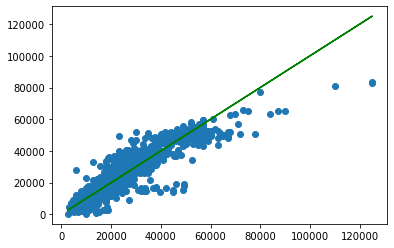

In [102]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g" )

In [105]:
dataFrame.iloc[5]

year           2016.0
price         13900.0
mileage       32260.0
tax              30.0
mpg              58.9
engineSize        1.4
Name: 5, dtype: float64

In [108]:
yeniArabaSeries = dataFrame.drop("price", axis=1).iloc[5]

In [110]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [111]:
model.predict(yeniArabaSeries)

array([[12642.359]], dtype=float32)